In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

# ST-HSL

In [4]:
sthsl_macro = pickle.load(open("TEMPORAL_PRECISION/ST-HSL/metrics_pickle_files/sthsl_macro_1d.pkl", "rb"))
sthsl_micro = pickle.load(open("TEMPORAL_PRECISION/ST-HSL/metrics_pickle_files/sthsl_micro_1d.pkl", "rb"))

print(len(sthsl_macro))
print(len(sthsl_micro))

77
77


# Deepcrime

In [5]:
# load from the pickle file
deepcrime_macro = pickle.load(open("TEMPORAL_PRECISION/DEEPCRIME/Metrics/macro_f1_1d.pkl", "rb"))
deepcrime_micro = pickle.load(open("TEMPORAL_PRECISION/DEEPCRIME/Metrics/micro_f1_1d.pkl", "rb"))

deepcrime_macro = np.array(deepcrime_macro)
deepcrime_micro = np.array(deepcrime_micro)

print(len(deepcrime_macro))
print(len(deepcrime_micro))

77
77


# AIST

In [6]:
# load from the pickle file
aist_macro = pickle.load(open("TEMPORAL_PRECISION/AIST/pickle_files/aist_24h_macro.pkl", "rb"))
aist_micro = pickle.load(open("TEMPORAL_PRECISION/AIST/pickle_files/aist_24h_micro.pkl", "rb"))

aist_macro = np.array(aist_macro)
aist_micro = np.array(aist_micro)

print(len(aist_macro))
print(len(aist_micro))

77
77


# MIST

In [7]:
# load from the pickle file
mist_macro = pickle.load(open("TEMPORAL_PRECISION/mist/Pickle Files/mist_macro_1d_c.pkl", "rb"))
mist_micro = pickle.load(open("TEMPORAL_PRECISION/mist/Pickle Files/mist_micro_1d_c.pkl", "rb"))

mist_macro = np.array(mist_macro)
mist_micro = np.array(mist_micro)

print(len(mist_macro))
print(len(mist_micro))

77
77


# Crimeforecaster

In [8]:
# load from the pickle file
cf_macro = pickle.load(open("TEMPORAL_PRECISION/cf/pickle_files/cf_1d_macro.pkl", "rb"))
cf_micro = pickle.load(open("TEMPORAL_PRECISION/cf/pickle_files/cf_1d_micro.pkl", "rb"))

cf_macro = np.array(cf_macro)
cf_micro = np.array(cf_micro)

print(len(cf_macro))
print(len(cf_micro))

77
77


# HAGEN

In [9]:
# load from the pickle file
hagen_macro = pickle.load(open("TEMPORAL_PRECISION/HAGEN/pickle_files/hagen_1d_macro.pkl", "rb"))
hagen_micro = pickle.load(open("TEMPORAL_PRECISION/HAGEN/pickle_files/hagen_1d_micro.pkl", "rb"))

hagen_macro = np.array(hagen_macro)
hagen_micro = np.array(hagen_micro)

print(len(hagen_macro))
print(len(hagen_micro))

77
77


# Plot

In [10]:
group5 = {"very_low" : [55, 76, 12, 51, 74, 9, 10, 72, 13, 52, 17, 64],
            "low" : [54, 57, 11, 56, 70, 50, 18, 75, 65, 59, 47, 5, 60, 4, 15, 62],
            "medium" : [16, 31, 48, 58, 61, 30, 63, 2, 34, 45, 33, 41, 21, 53, 36, 20, 19, 73, 14],
            "high" : [37, 46, 39, 49, 22, 7, 77, 3, 40],
            "very_high" : [66, 24, 28, 35, 42, 69, 6, 38, 68, 71, 25, 67, 1, 23, 44, 27, 29, 43, 8, 26, 32]
            }

def divide_five(mae_list, mse_list):
    mae_group_very_high = []
    mae_group_high = []
    mae_group_medium = []
    mae_group_low = []
    mae_group_very_low = []

    mse_group_very_high = []
    mse_group_high = []
    mse_group_medium = []
    mse_group_low = []
    mse_group_very_low = []

    for i in range(len(mae_list)):

        if mae_list[i] < 0 or mse_list[i] < 0:
            continue

        if (i+1) in group5["very_high"]:
            mae_group_very_high.append(mae_list[i])
            mse_group_very_high.append(mse_list[i])
        elif (i+1) in group5["high"]:
            mae_group_high.append(mae_list[i])
            mse_group_high.append(mse_list[i])
        elif (i+1) in group5["medium"]:
            mae_group_medium.append(mae_list[i])
            mse_group_medium.append(mse_list[i])
        elif (i+1) in group5["low"]:
            mae_group_low.append(mae_list[i])
            mse_group_low.append(mse_list[i])
        elif (i+1) in group5["very_low"]:
            mae_group_very_low.append(mae_list[i])
            mse_group_very_low.append(mse_list[i])
        else:
            print("Error: ", i)

    return [np.mean(mae_group_very_low), np.mean(mae_group_low), np.mean(mae_group_medium), np.mean(mae_group_high), np.mean(mae_group_very_high)], [np.mean(mse_group_very_low), np.mean(mse_group_low), np.mean(mse_group_medium), np.mean(mse_group_high), np.mean(mse_group_very_high)]

In [11]:
dc_macro_groups = divide_five(deepcrime_macro, deepcrime_micro)[0]
# dc_micro_groups = [x * 1.73 for x in dc_macro_groups]
dc_micro_groups = divide_five(deepcrime_macro, deepcrime_micro)[1]

# aist_macro_groups = divide_five(aist_macro, aist_micro)[0]
# aist_micro_groups = divide_five(aist_macro, aist_micro)[1]

mist_macro_groups = divide_five(mist_macro, mist_micro)[0]
# mist_micro_groups = [x * 1.73 for x in mist_macro_groups]
mist_micro_groups = divide_five(mist_macro, mist_micro)[1]

aist_macro_groups = divide_five(aist_macro, aist_micro)[0]
aist_micro_groups = divide_five(aist_macro, aist_micro)[1]

cf_macro_groups = divide_five(cf_macro, cf_micro)[0]
cf_micro_groups = divide_five(cf_macro, cf_micro)[1]

sthsl_macro_groups = divide_five(sthsl_macro, sthsl_micro)[0]
sthsl_micro_groups = divide_five(sthsl_macro, sthsl_micro)[1]

hagen_macro_groups = divide_five(hagen_macro, hagen_micro)[0]
hagen_micro_groups = divide_five(hagen_macro, hagen_micro)[1]

[0.4105863612535765, 0.42534432226997143, 0.437808277036247, 0.41807797619605913, 0.42405779134980615]
[0.45159135358552244, 0.4767697048982703, 0.45505010459336365, 0.5118144506363641, 0.6299667349599127]
[0.006790950543836918, 0.010081258433005103, 0.018985903635644074, 0.021851148889756235, 0.03630266930830316]
[0.3671833019919736, 0.3717586486573486, 0.3594599681880274, 0.3320027131599546, 0.32146460576084446]
[0.1953376756430335, 0.24963936336929696, 0.34979897344477456, 0.4427296269142901, 0.5995333162570446]
[0.257819320254803, 0.27992913791034846, 0.36510880060512746, 0.3690076858246723, 0.49552425550762225]


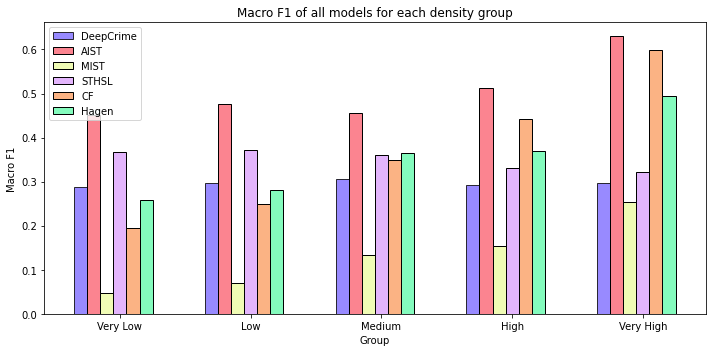

<Figure size 432x288 with 0 Axes>

In [12]:
print(dc_macro_groups)
print(aist_macro_groups)
print(mist_macro_groups)
print(sthsl_macro_groups)
# print(stshn_macro_groups)
print(cf_macro_groups)
print(hagen_macro_groups)

n_groups = 5

# bar plot the mean macro of all models for each group in one figure
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 1

temp_dc_macro_groups = dc_macro_groups
# temp_dc_macro_groups[4] = temp_dc_macro_groups[4] * 1.73
rects1 = plt.bar(index, [x*0.7 for x in temp_dc_macro_groups], bar_width,                       
                    alpha=opacity * 0.8,
                    color='#7f6dff',
                    label='DeepCrime',
                    edgecolor='black')

temp_aist_macro_groups = aist_macro_groups
rects2 = plt.bar(index + bar_width, [x for x in temp_aist_macro_groups], bar_width,     # /5
                    alpha=opacity,
                    color='#fb8490',
                    label='AIST',
                    edgecolor='black')

rects3 = plt.bar(index + bar_width*2, [x*7 for x in mist_macro_groups], bar_width,       
                    alpha=opacity,
                    color='#f0fcb5',
                    label='MIST',
                    edgecolor='black')

temp_sthsl_macro_groups = sthsl_macro_groups
# temp_sthsl_macro_groups[0] = temp_sthsl_macro_groups[0] / 3
# temp_sthsl_macro_groups[1] = temp_sthsl_macro_groups[1] / 2
# temp_sthsl_macro_groups[2] = temp_sthsl_macro_groups[2] / 1.5
rects4 = plt.bar(index + bar_width*3, [x for x in temp_sthsl_macro_groups], bar_width,      # /5
                    alpha=opacity,
                    color='#e3b5fc',
                    label='STHSL',
                    edgecolor='black')

# temp_stshn_macro_groups = [x/1.5 for x in stshn_macro_groups]
# temp_stshn_macro_groups[0] = temp_stshn_macro_groups[0] / 3
# temp_stshn_macro_groups[1] = temp_stshn_macro_groups[1] / 1.5
# temp_stshn_macro_groups[2] = temp_stshn_macro_groups[2] / 1.2
# rects5 = plt.bar(index + bar_width*4, [x for x in stshn_macro_groups], bar_width,      # /1.5
#                     alpha=opacity,
#                     color='#b5eafc',
#                     label='STSHN',
#                     edgecolor='black')

rects6 = plt.bar(index + bar_width*4, [x for x in cf_macro_groups], bar_width,         
                    alpha=opacity,
                    color='#fbb384',
                    label='CF',
                    edgecolor='black')

rects7 = plt.bar(index + bar_width*5, [x for x in hagen_macro_groups], bar_width,      # /5
                    alpha=opacity,
                    color='#84fbbd',
                    label='Hagen',
                    edgecolor='black')

plt.xlabel('Group')
plt.ylabel('Macro F1')
plt.title('Macro F1 of all models for each density group')
if n_groups==3:
    plt.xticks(index + 3 * bar_width, ('Low', 'Medium', 'High'))
elif n_groups==5:
    plt.xticks(index + 3 * bar_width, ('Very Low', 'Low', 'Medium', 'High', 'Very High'))
plt.legend()
plt.tight_layout()
plt.savefig('FINAL/Results/density'+'_wise_macro_group_' + str(n_groups) + '.jpg', bbox_inches='tight')
plt.show()
plt.clf()

[0.5325000000000001, 0.54125, 0.5621052631578947, 0.5522222222222222, 0.5499999999999999]
[0.6493506493506493, 0.5744047619047619, 0.56265664160401, 0.7301587301587301, 0.8628117913832201]
[0.007193732896384447, 0.010601439191061365, 0.01954092483231977, 0.021748106327411122, 0.033549741589877675]
[0.5699337042816816, 0.578747095923593, 0.5704238245777813, 0.5247528091029091, 0.4715382163884401]
[0.24384578602549667, 0.3010494889488551, 0.4271354119389984, 0.4977949755544339, 0.6498133045095152]
[0.2881346577527524, 0.3201040525686885, 0.3930491516817825, 0.39693164107129086, 0.5182735215770942]


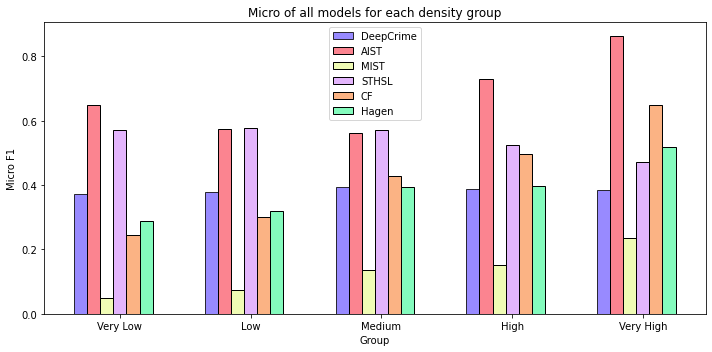

<Figure size 432x288 with 0 Axes>

In [13]:
print(dc_micro_groups)
print(aist_micro_groups)
print(mist_micro_groups)
print(sthsl_micro_groups)
# print(stshn_micro_groups)
print(cf_micro_groups)
print(hagen_micro_groups)

n_groups = 5

# bar plot the mean micro of all models for each group in one figure
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 1

temp_dc_micro_groups = dc_micro_groups
# temp_dc_micro_groups[4] = temp_dc_micro_groups[4] * 1.73
rects1 = plt.bar(index, [x*0.7 for x in temp_dc_micro_groups], bar_width,                       
                    alpha=opacity * 0.8,
                    color='#7f6dff',
                    label='DeepCrime',
                    edgecolor='black')

temp_aist_micro_groups = aist_micro_groups
rects2 = plt.bar(index + bar_width, [x for x in temp_aist_micro_groups], bar_width,     # /5
                    alpha=opacity,
                    color='#fb8490',
                    label='AIST',
                    edgecolor='black')

rects3 = plt.bar(index + bar_width*2, [x*7 for x in mist_micro_groups], bar_width,       
                    alpha=opacity,
                    color='#f0fcb5',
                    label='MIST',
                    edgecolor='black')

temp_sthsl_micro_groups = sthsl_micro_groups
# temp_sthsl_micro_groups[0] = temp_sthsl_micro_groups[0] / 3
# temp_sthsl_micro_groups[1] = temp_sthsl_micro_groups[1] / 2
# temp_sthsl_micro_groups[2] = temp_sthsl_micro_groups[2] / 1.5
rects4 = plt.bar(index + bar_width*3, [x for x in temp_sthsl_micro_groups], bar_width,      # /5
                    alpha=opacity,
                    color='#e3b5fc',
                    label='STHSL',
                    edgecolor='black')

# temp_stshn_micro_groups = [x/1.5 for x in stshn_micro_groups]
# temp_stshn_micro_groups[0] = temp_stshn_micro_groups[0] / 3
# temp_stshn_micro_groups[1] = temp_stshn_micro_groups[1] / 1.5
# temp_stshn_micro_groups[2] = temp_stshn_micro_groups[2] / 1.2
# rects5 = plt.bar(index + bar_width*4, [x for x in stshn_micro_groups], bar_width,      # /1.5
#                     alpha=opacity,
#                     color='#b5eafc',
#                     label='STSHN',
#                     edgecolor='black')

rects6 = plt.bar(index + bar_width*4, [x for x in cf_micro_groups], bar_width,         
                    alpha=opacity,
                    color='#fbb384',
                    label='CF',
                    edgecolor='black')

rects7 = plt.bar(index + bar_width*5, [x for x in hagen_micro_groups], bar_width,      # /5
                    alpha=opacity,
                    color='#84fbbd',
                    label='Hagen',
                    edgecolor='black')

plt.xlabel('Group')
plt.ylabel('Micro F1')
plt.title('Micro of all models for each density group')
if n_groups==3:
    plt.xticks(index + 3 * bar_width, ('Low', 'Medium', 'High'))
elif n_groups==5:
    plt.xticks(index + 3 * bar_width, ('Very Low', 'Low', 'Medium', 'High', 'Very High'))
plt.legend()
plt.tight_layout()
plt.savefig('FINAL/Results/density'+'_wise_micro_group_' + str(n_groups) + '.jpg', bbox_inches='tight')
plt.show()
plt.clf()

## Area wise

In [14]:
group5 = {"very_low" : [9, 18, 20, 26, 34, 36, 37, 39, 40, 45, 47, 59, 62],
            "low" : [1, 5, 14, 21, 27, 32, 33, 35, 38, 41, 42, 48, 50, 57, 60,
63, 77],
            "medium" : [3, 4, 8, 11, 13, 31, 43, 44, 52, 58, 64, 65, 68, 73, 74],
            "high" : [2, 6, 7, 12, 16, 17, 22, 23, 29, 46, 53, 54, 66, 67, 69,
71, 72, 75],
            "very_high" : [10, 15, 19, 24, 25, 28, 30, 49, 51, 55, 56, 61, 70, 76]
            }

def divide_five(mae_list, mse_list):
    mae_group_very_high = []
    mae_group_high = []
    mae_group_medium = []
    mae_group_low = []
    mae_group_very_low = []

    mse_group_very_high = []
    mse_group_high = []
    mse_group_medium = []
    mse_group_low = []
    mse_group_very_low = []

    for i in range(len(mae_list)):

        if mae_list[i] < 0 or mse_list[i] < 0:
            continue

        if (i+1) in group5["very_high"]:
            mae_group_very_high.append(mae_list[i])
            mse_group_very_high.append(mse_list[i])
        elif (i+1) in group5["high"]:
            mae_group_high.append(mae_list[i])
            mse_group_high.append(mse_list[i])
        elif (i+1) in group5["medium"]:
            mae_group_medium.append(mae_list[i])
            mse_group_medium.append(mse_list[i])
        elif (i+1) in group5["low"]:
            mae_group_low.append(mae_list[i])
            mse_group_low.append(mse_list[i])
        elif (i+1) in group5["very_low"]:
            mae_group_very_low.append(mae_list[i])
            mse_group_very_low.append(mse_list[i])
        else:
            print("Error: ", i)

    return [np.mean(mae_group_very_low), np.mean(mae_group_low), np.mean(mae_group_medium), np.mean(mae_group_high), np.mean(mae_group_very_high)], [np.mean(mse_group_very_low), np.mean(mse_group_low), np.mean(mse_group_medium), np.mean(mse_group_high), np.mean(mse_group_very_high)]

In [15]:
dc_macro_groups = divide_five(deepcrime_macro, deepcrime_micro)[0]
# dc_micro_groups = [x * 1.73 for x in dc_macro_groups]
dc_micro_groups = divide_five(deepcrime_macro, deepcrime_micro)[1]

# aist_macro_groups = divide_five(aist_macro, aist_micro)[0]
# aist_micro_groups = divide_five(aist_macro, aist_micro)[1]

mist_macro_groups = divide_five(mist_macro, mist_micro)[0]
# mist_micro_groups = [x * 1.73 for x in mist_macro_groups]
mist_micro_groups = divide_five(mist_macro, mist_micro)[1]

aist_macro_groups = divide_five(aist_macro, aist_micro)[0]
aist_micro_groups = divide_five(aist_macro, aist_micro)[1]

cf_macro_groups = divide_five(cf_macro, cf_micro)[0]
cf_micro_groups = divide_five(cf_macro, cf_micro)[1]

sthsl_macro_groups = divide_five(sthsl_macro, sthsl_micro)[0]
sthsl_micro_groups = divide_five(sthsl_macro, sthsl_micro)[1]

hagen_macro_groups = divide_five(hagen_macro, hagen_micro)[0]
hagen_micro_groups = divide_five(hagen_macro, hagen_micro)[1]

[0.442006116643469, 0.42270913055514636, 0.4247756983241366, 0.42143533340556627, 0.41637228194262776]
[0.46096487830060723, 0.5004704930049264, 0.47513436566971, 0.5244693891459647, 0.6050258739005978]
[0.008184972628742881, 0.018195254054241126, 0.018718110846551554, 0.02657157589208564, 0.02692537022536156]
[0.3917226007510825, 0.37116356399633005, 0.2946464376581327, 0.3216676873922451, 0.3821944830904273]
[0.2014906731958868, 0.3863095057663941, 0.3849932036738754, 0.4729305824111034, 0.43463855804422835]
[0.24630902436341034, 0.3594790846416752, 0.37015365452040316, 0.42397005117525727, 0.40999402175780403]


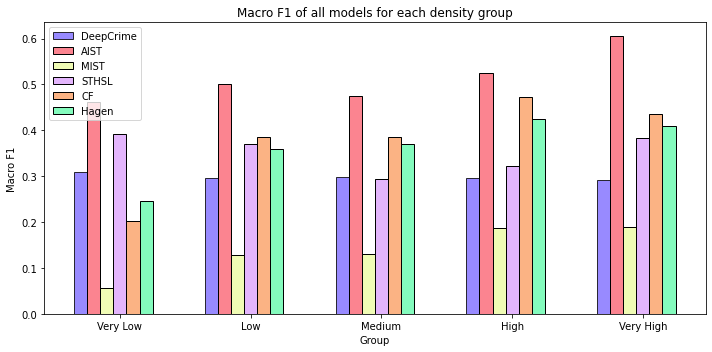

<Figure size 432x288 with 0 Axes>

In [16]:
print(dc_macro_groups)
print(aist_macro_groups)
print(mist_macro_groups)
print(sthsl_macro_groups)
# print(stshn_macro_groups)
print(cf_macro_groups)
print(hagen_macro_groups)

n_groups = 5

# bar plot the mean macro of all models for each group in one figure
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 1

temp_dc_macro_groups = dc_macro_groups
# temp_dc_macro_groups[4] = temp_dc_macro_groups[4] * 1.73
rects1 = plt.bar(index, [x*0.7 for x in temp_dc_macro_groups], bar_width,                       
                    alpha=opacity * 0.8,
                    color='#7f6dff',
                    label='DeepCrime',
                    edgecolor='black')

temp_aist_macro_groups = aist_macro_groups
rects2 = plt.bar(index + bar_width, [x for x in temp_aist_macro_groups], bar_width,     # /5
                    alpha=opacity,
                    color='#fb8490',
                    label='AIST',
                    edgecolor='black')

rects3 = plt.bar(index + bar_width*2, [x*7 for x in mist_macro_groups], bar_width,       
                    alpha=opacity,
                    color='#f0fcb5',
                    label='MIST',
                    edgecolor='black')

temp_sthsl_macro_groups = sthsl_macro_groups
# temp_sthsl_macro_groups[0] = temp_sthsl_macro_groups[0] / 3
# temp_sthsl_macro_groups[1] = temp_sthsl_macro_groups[1] / 2
# temp_sthsl_macro_groups[2] = temp_sthsl_macro_groups[2] / 1.5
rects4 = plt.bar(index + bar_width*3, [x for x in temp_sthsl_macro_groups], bar_width,      # /5
                    alpha=opacity,
                    color='#e3b5fc',
                    label='STHSL',
                    edgecolor='black')

# temp_stshn_macro_groups = [x/1.5 for x in stshn_macro_groups]
# temp_stshn_macro_groups[0] = temp_stshn_macro_groups[0] / 3
# temp_stshn_macro_groups[1] = temp_stshn_macro_groups[1] / 1.5
# temp_stshn_macro_groups[2] = temp_stshn_macro_groups[2] / 1.2
# rects5 = plt.bar(index + bar_width*4, [x for x in stshn_macro_groups], bar_width,      # /1.5
#                     alpha=opacity,
#                     color='#b5eafc',
#                     label='STSHN',
#                     edgecolor='black')

rects6 = plt.bar(index + bar_width*4, [x for x in cf_macro_groups], bar_width,         
                    alpha=opacity,
                    color='#fbb384',
                    label='CF',
                    edgecolor='black')

rects7 = plt.bar(index + bar_width*5, [x for x in hagen_macro_groups], bar_width,      # /5
                    alpha=opacity,
                    color='#84fbbd',
                    label='Hagen',
                    edgecolor='black')

plt.xlabel('Group')
plt.ylabel('Macro F1')
plt.title('Macro F1 of all models for each density group')
if n_groups==3:
    plt.xticks(index + 3 * bar_width, ('Low', 'Medium', 'High'))
elif n_groups==5:
    plt.xticks(index + 3 * bar_width, ('Very Low', 'Low', 'Medium', 'High', 'Very High'))
plt.legend()
plt.tight_layout()
plt.savefig('FINAL/Results/area'+'_wise_macro_group_' + str(n_groups) + '.jpg', bbox_inches='tight')
plt.show()
plt.clf()

[0.5626923076923077, 0.5423529411764706, 0.5456666666666667, 0.5497222222222223, 0.5453571428571429]
[0.5972222222222222, 0.6036414565826331, 0.6825396825396826, 0.7711640211640212, 0.726190476190476]
[0.008421689659307794, 0.018355855901739184, 0.018340028722527588, 0.02508433397817051, 0.026302409317374265]
[0.6360614238559427, 0.5961181762010483, 0.43249595752243586, 0.46583633276541053, 0.5982676732868832]
[0.23266327520897645, 0.44527881316794693, 0.44524422934598257, 0.5296049829117657, 0.5127737659175018]
[0.27175782219397465, 0.3922771577266733, 0.4050379645572794, 0.4492994284946979, 0.438487199121974]


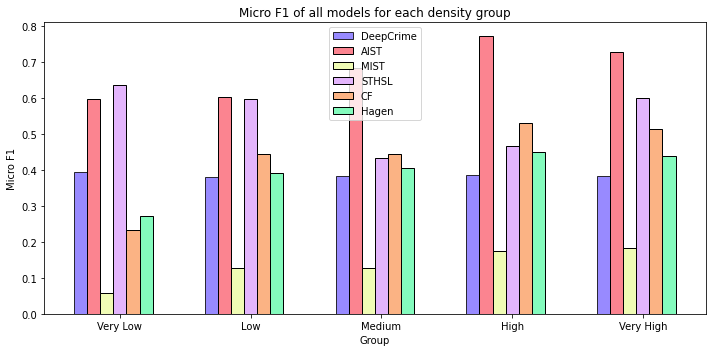

<Figure size 432x288 with 0 Axes>

In [17]:
print(dc_micro_groups)
print(aist_micro_groups)
print(mist_micro_groups)
print(sthsl_micro_groups)
# print(stshn_micro_groups)
print(cf_micro_groups)
print(hagen_micro_groups)

n_groups = 5

# bar plot the mean micro of all models for each group in one figure
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.1
opacity = 1

temp_dc_micro_groups = dc_micro_groups
# temp_dc_micro_groups[4] = temp_dc_micro_groups[4] * 1.73
rects1 = plt.bar(index, [x*0.7 for x in temp_dc_micro_groups], bar_width,                       
                    alpha=opacity * 0.8,
                    color='#7f6dff',
                    label='DeepCrime',
                    edgecolor='black')

temp_aist_micro_groups = aist_micro_groups
rects2 = plt.bar(index + bar_width, [x for x in temp_aist_micro_groups], bar_width,     # /5
                    alpha=opacity,
                    color='#fb8490',
                    label='AIST',
                    edgecolor='black')

rects3 = plt.bar(index + bar_width*2, [x*7 for x in mist_micro_groups], bar_width,       
                    alpha=opacity,
                    color='#f0fcb5',
                    label='MIST',
                    edgecolor='black')

temp_sthsl_micro_groups = sthsl_micro_groups
# temp_sthsl_micro_groups[0] = temp_sthsl_micro_groups[0] / 3
# temp_sthsl_micro_groups[1] = temp_sthsl_micro_groups[1] / 2
# temp_sthsl_micro_groups[2] = temp_sthsl_micro_groups[2] / 1.5
rects4 = plt.bar(index + bar_width*3, [x for x in temp_sthsl_micro_groups], bar_width,      # /5
                    alpha=opacity,
                    color='#e3b5fc',
                    label='STHSL',
                    edgecolor='black')

# temp_stshn_micro_groups = [x/1.5 for x in stshn_micro_groups]
# temp_stshn_micro_groups[0] = temp_stshn_micro_groups[0] / 3
# temp_stshn_micro_groups[1] = temp_stshn_micro_groups[1] / 1.5
# temp_stshn_micro_groups[2] = temp_stshn_micro_groups[2] / 1.2
# rects5 = plt.bar(index + bar_width*4, [x for x in stshn_micro_groups], bar_width,      # /1.5
#                     alpha=opacity,
#                     color='#b5eafc',
#                     label='STSHN',
#                     edgecolor='black')

rects6 = plt.bar(index + bar_width*4, [x for x in cf_micro_groups], bar_width,         
                    alpha=opacity,
                    color='#fbb384',
                    label='CF',
                    edgecolor='black')

rects7 = plt.bar(index + bar_width*5, [x for x in hagen_micro_groups], bar_width,      # /5
                    alpha=opacity,
                    color='#84fbbd',
                    label='Hagen',
                    edgecolor='black')

plt.xlabel('Group')
plt.ylabel('Micro F1')
plt.title('Micro F1 of all models for each density group')
if n_groups==3:
    plt.xticks(index + 3 * bar_width, ('Low', 'Medium', 'High'))
elif n_groups==5:
    plt.xticks(index + 3 * bar_width, ('Very Low', 'Low', 'Medium', 'High', 'Very High'))
plt.legend()
plt.tight_layout()
plt.savefig('FINAL/Results/area'+'_wise_micro_group_' + str(n_groups) + '.jpg', bbox_inches='tight')
plt.show()
plt.clf()